In [1]:
import sys
import os
SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)
from simulate import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

main_dir = os.path.abspath(os.path.dirname(os.getcwd()))
main_dir

ACT-R connection has been started.


'/home/chery/Documents/Github/RLvIBL-Re'

In [2]:
log_dir = 'data/simulation_pr_analysis3'

In [3]:
df1 = merge_parameter_recovery_data(main_dir=main_dir, log_dir=log_dir, model='model1')
df2 = merge_parameter_recovery_data(main_dir=main_dir, log_dir=log_dir, model='model2')

In [4]:
df1.shape, df2.shape

((69993, 4), (70401, 4))

In [5]:
dfroc = pd.concat([df1, df2], axis=0, ignore_index=True)
dfroc.describe()

,m.original,m.recovery
count,140394.000000,140394.000000
mean,1.359139,0.381621
std,1.164231,0.334899
min,0.100000,0.000000
25%,0.500000,0.100000
50%,1.000000,0.250000
75%,2.000000,0.500000
max,4.000000,1.000000


## Parameter Recovery

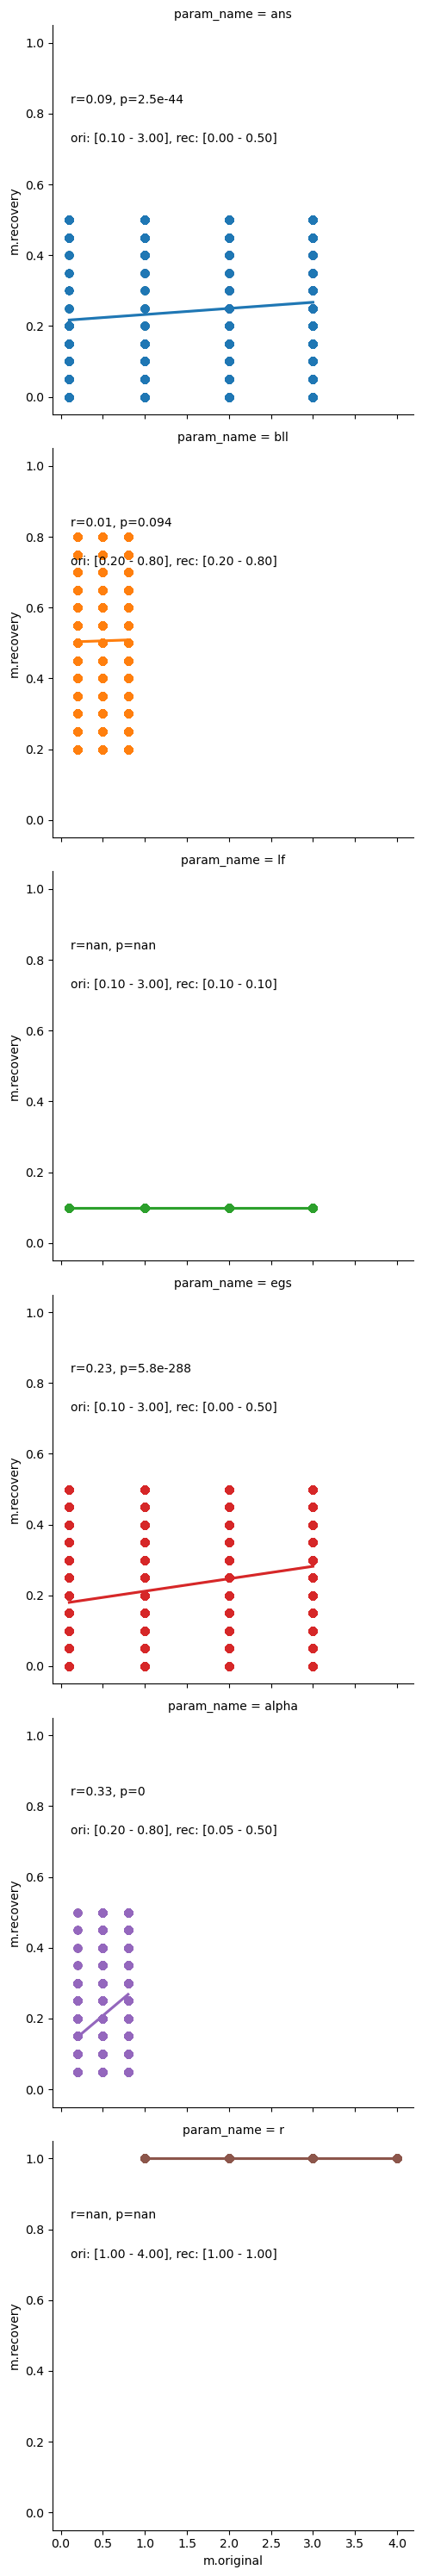

In [6]:
def annotate(data, **kws):
    r, p = stats.pearsonr(data['m.original'], data['m.recovery'])
    ax = plt.gca()
    ax.text(.05, 0.8, 'r={:.2f}, p={:.2g}'.format(r, p), 
            transform=ax.transAxes)
    min1, min2, max1, max2 = data['m.original'].min(), data['m.recovery'].min(), data['m.original'].max(), data['m.recovery'].max()
    ax.text(.05, 0.7, 'ori: [%.2f - %.2f], rec: [%.2f - %.2f]' % (min1, max1, min2, max2), 
            transform=ax.transAxes)

g = sns.lmplot(data=dfroc, x='m.original', y='m.recovery', hue='param_name', row='param_name')
g.map_dataframe(annotate)
plt.show()